In [75]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_scalebar.scalebar import ScaleBar 

In [83]:
# Load the shapefile
shapefile_path = "Data/Revised/Geography/MSOA/London_2021.shp"
gdf = gpd.read_file(shapefile_path)

# Load the CSV file
csv_path = "Data/Revised/Migration/ODMG.csv"
df = pd.read_csv(csv_path, encoding='utf-8')

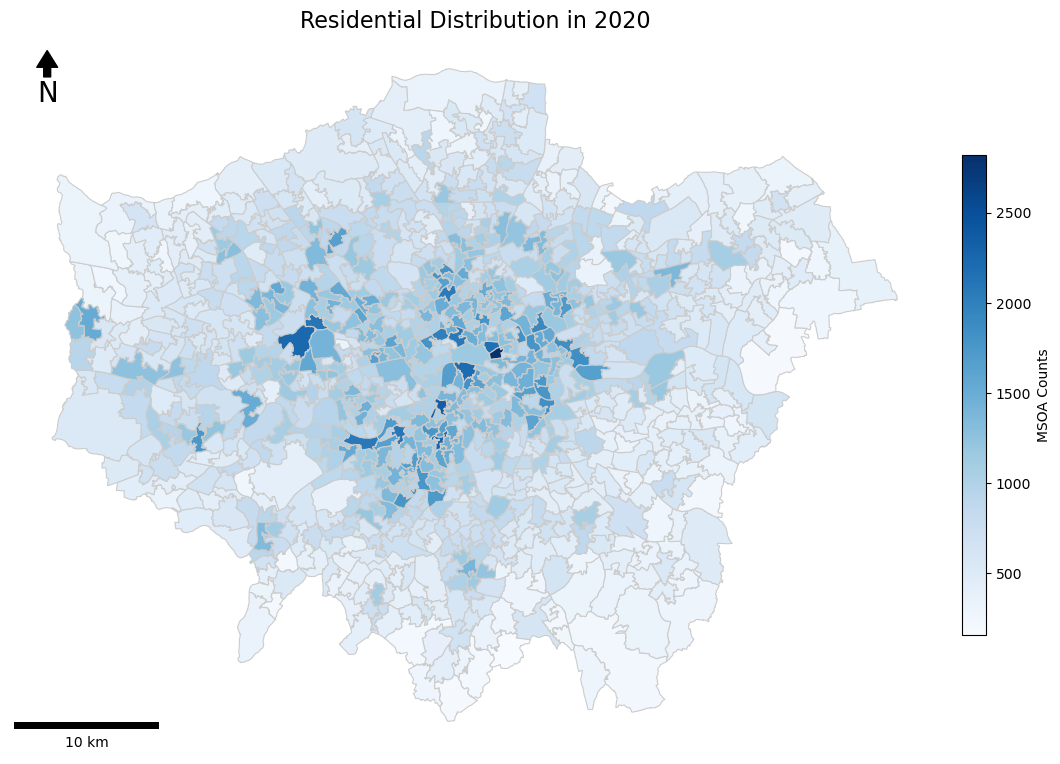

In [86]:
# Extract relevant data from CSV for 2021
df_2020 = df[['Code_2020', 'Count']].groupby('Code_2020').sum().reset_index()

# Merge 2021 data with shapefile using MSOA codes
gdf_2020 = gdf.merge(df_2020, left_on='msoa21cd', right_on='Code_2020', how='left')

# Set font to DejaVu Sans globally, resembling Arial
plt.rcParams['font.family'] = 'DejaVu Sans'

# Plotting the choropleth map for 2021 counts
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Plot the data with a yellow gradient color scheme
gdf_2020.plot(
    column='Count', 
    cmap='Blues',  # Blue shades
    linewidth=0.8, 
    ax=ax, 
    edgecolor='0.8', 
    legend=True,
    legend_kwds={'label': "MSOA Counts", 'orientation': "vertical", 'shrink': 0.5, 'pad': 0.02}
)

# Add title and turn off axis
ax.set_title('Residential Distribution in 2020', fontsize=16)
ax.axis('off')

# Add North arrow
x, y, arrow_length = 0.04, 0.98, 0.06
ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20, xycoords='axes fraction', zorder=5)

# Add scale bar with units in meters and set the background to transparent
scalebar = ScaleBar(dx=1, units="m", location='lower left', scale_loc='bottom', length_fraction=0.2, box_alpha=0)
ax.add_artist(scalebar)

# Adjust layout to align the color bar, scale bar, and map at the bottom
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)


# Save the figure as an image
output_path = "Data/Residential_Distribution_2020.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)

# Display the map
plt.show()

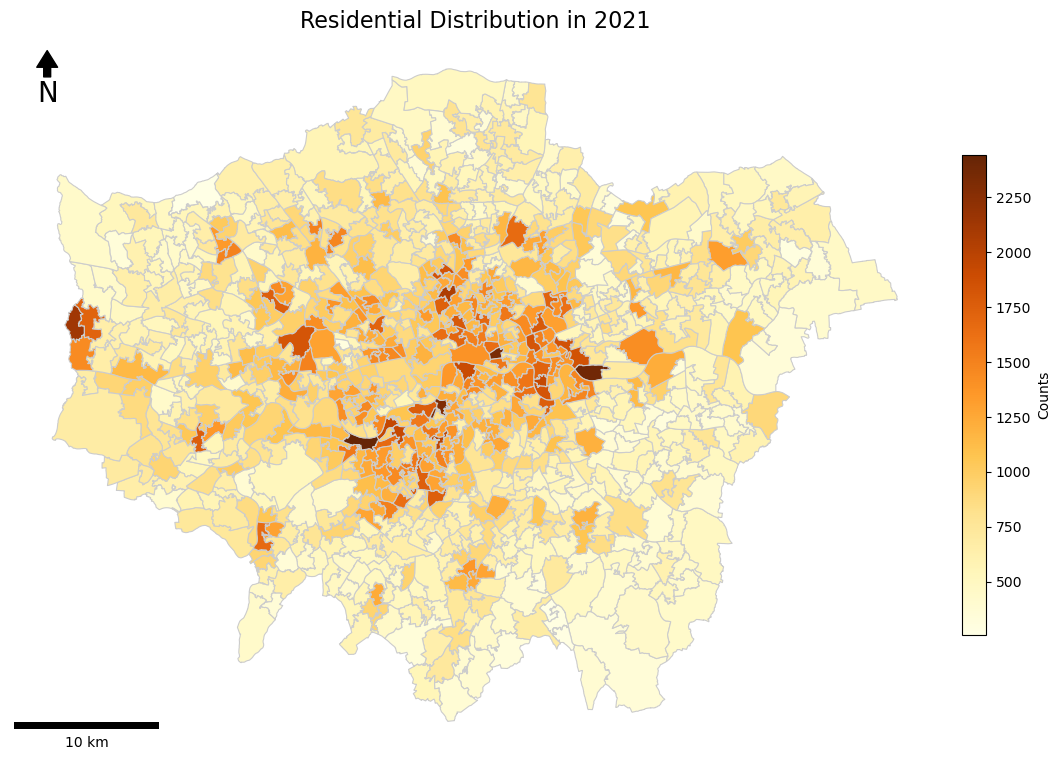

In [66]:
# Extract relevant data from CSV for 2021
df_2021 = df[['Code_2021', 'Count']].groupby('Code_2021').sum().reset_index()

# Merge 2021 data with shapefile using MSOA codes
gdf_2021 = gdf.merge(df_2021, left_on='msoa21cd', right_on='Code_2021', how='left')

# Set font to DejaVu Sans globally, resembling Arial
plt.rcParams['font.family'] = 'DejaVu Sans'

# Plotting the choropleth map for 2021 counts
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Plot the data with a yellow gradient color scheme
gdf_2021.plot(
    column='Count', 
    cmap='YlOrBr',  # Yellow shades
    linewidth=0.8, 
    ax=ax, 
    edgecolor='0.8', 
    legend=True,
    legend_kwds={'label': "Counts", 'orientation': "vertical", 'shrink': 0.5, 'pad': 0.02}
)

# Add title and turn off axis
ax.set_title('Residential Distribution in 2021', fontsize=16)
ax.axis('off')

# Add North arrow
x, y, arrow_length = 0.04, 0.98, 0.06
ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20, xycoords='axes fraction', zorder=5)

# Add scale bar with units in meters and set the background to transparent
scalebar = ScaleBar(dx=1, units="m", location='lower left', scale_loc='bottom', length_fraction=0.2, box_alpha=0)
ax.add_artist(scalebar)

# Adjust layout to align the color bar, scale bar, and map at the bottom
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Save the figure as an image
output_path = "Data/Residential_Distribution_2021.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)

# Display the map
plt.show()

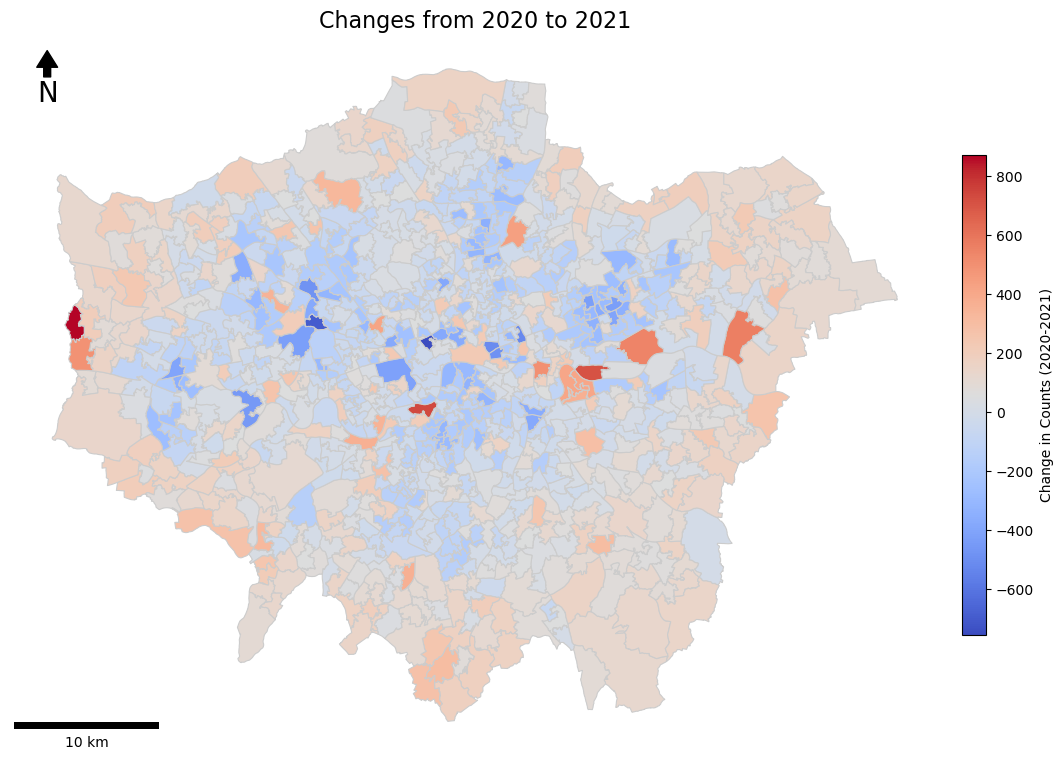

In [69]:
# Load the shapefile for MSOAs
shapefile_path = "Data/Revised/Geography/MSOA/London_2021.shp"
gdf = gpd.read_file(shapefile_path)

# Load the counts for 2020 and 2021
df_2020 = df[['Code_2020', 'Count']].groupby('Code_2020').sum().reset_index()
df_2021 = df[['Code_2021', 'Count']].groupby('Code_2021').sum().reset_index()

# Rename columns to prepare for merging
df_2020.columns = ['MSOA_Code', 'Count_2020']
df_2021.columns = ['MSOA_Code', 'Count_2021']

# Merge the two datasets on MSOA codes
merged_df = pd.merge(df_2020, df_2021, on='MSOA_Code', how='outer').fillna(0)

# Calculate the absolute change between 2020 and 2021
merged_df['Change'] = merged_df['Count_2021'] - merged_df['Count_2020']

# Merge the change data with MSOA geometries
gdf_changes = gdf.merge(merged_df, left_on='msoa21cd', right_on='MSOA_Code')

# Set font to DejaVu Sans globally, resembling Arial
plt.rcParams['font.family'] = 'DejaVu Sans'

# Plotting the changes as a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Plot the change with a colormap that highlights increases and decreases
gdf_changes.plot(
    column='Change',
    cmap='coolwarm',  # Blue for decreases, red for increases
    linewidth=0.8, 
    ax=ax, 
    edgecolor='0.8', 
    legend=True,
    legend_kwds={'label': "Change in Counts (2020-2021)", 'orientation': "vertical", 'shrink': 0.5, 'pad': 0.02}
)

# Add title and turn off axis
ax.set_title('Changes from 2020 to 2021', fontsize=16)
ax.axis('off')

# Add North arrow
x, y, arrow_length = 0.04, 0.98, 0.06
ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20, xycoords='axes fraction', zorder=5)

# Add scale bar with units in meters and set the background to transparent
scalebar = ScaleBar(dx=1, units="m", location='lower left', scale_loc='bottom', length_fraction=0.2, box_alpha=0)
ax.add_artist(scalebar)

# Adjust layout to align the color bar, scale bar, and map at the bottom
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Save the figure as an image
output_path = "Data/Change.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)

# Display the map
plt.show()